In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pixell import powspec
import os


%matplotlib inline

### Notebook description

Last Updated: Dec 1st, 2021

This notebook shows how to reproduce some of key plots and results from [Han et al (2021)](https://arxiv.org/abs/xxxxxxx). The latest version of this notebook is available at https://github.com/dwhan89/hdlensing.

###### Code Dependencies
- Numpy (https://numpy.org/)
- Matplotlib (https://matplotlib.org/)
- Pixell (https://github.com/simonsobs/pixell)

###### To-Dos
- Update the arxiv url when we release the draft

In [22]:
data_dir = "./data"
def data_path(x):
    return os.path.join(data_dir, x)

In [24]:
## Load Data Files For Figure 1

## helper functions
def cl2dl(l, cl):
    return l*(l+1)/(2*np.pi)*cl

lmax = 30000
l = np.arange(lmax+1)
freqs = [90, 150] ## GHz

## Planck 2018 Lenesed CMB Power Spectra (generated using CAMB; https://arxiv.org/abs/astro-ph/9911177)
ps_cmb = powspec.read_spectrum(data_path("planck2018_30000_lensedCls.dat")) 
ps_cmb = cl2dl(l, ps_cmb[0][0])


ps_fgs = {}
ps_fgs = {"f90":{}, "f150":{}}

## Reionization kSZ power spectrum (from Smith et al. 2018; https://arxiv.org/abs/1810.13423)
## column1: l, column2: cl_ksz_reion
temp = np.loadtxt(data_path("reionization_ksz.txt"))
cl_ksz = np.zeros(30000+1)
cl_ksz[:25000] = temp[:,1]
cl_ksz[25000:] = temp[-1,1]
dl_ksz = cl2dl(l, cl_ksz)

ps_fgs["f90"]["ksz"] = dl_ksz.copy()
ps_fgs["f150"]["ksz"] = dl_ksz.copy()

## Load simulated tSZ, CIB, Radio power spectra (See Han et al. 2021 for details)
## column1: l, column2: dltsz, column3: dlcib, column4: dlrad
for freq in freqs:
    tsz = np.loadtxt(data_path(f"cmbhd_tszcibrad_dls_f{freq}.txt"))[:,1]
    cib = np.loadtxt(data_path(f"cmbhd_tszcibrad_dls_f{freq}.txt"))[:,2]
    rad = np.loadtxt(data_path(f"cmbhd_tszcibrad_dls_f{freq}.txt"))[:,3]
    ps_fgs[f"f{freq}"]["tsz"] = tsz.copy()
    ps_fgs[f"f{freq}"]["cib"] = cib.copy()
    ps_fgs[f"f{freq}"]["rad"] = rad.copy()
    ps_fgs[f"f{freq}"]["total"] = ps_fgs[f"f{freq}"]["ksz"] + tsz + cib + rad

## Load noise spectra
## column1: l, column2: nl
nls = {}
for freq in freqs:
    nl = np.loadtxt(data_path(f"cmbhd_white_noise_cls_f{freq}.txt"))[:,1]
    nls[f"f{freq}"] = cl2dl(l, nl) 


/home/dwhan89/.miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


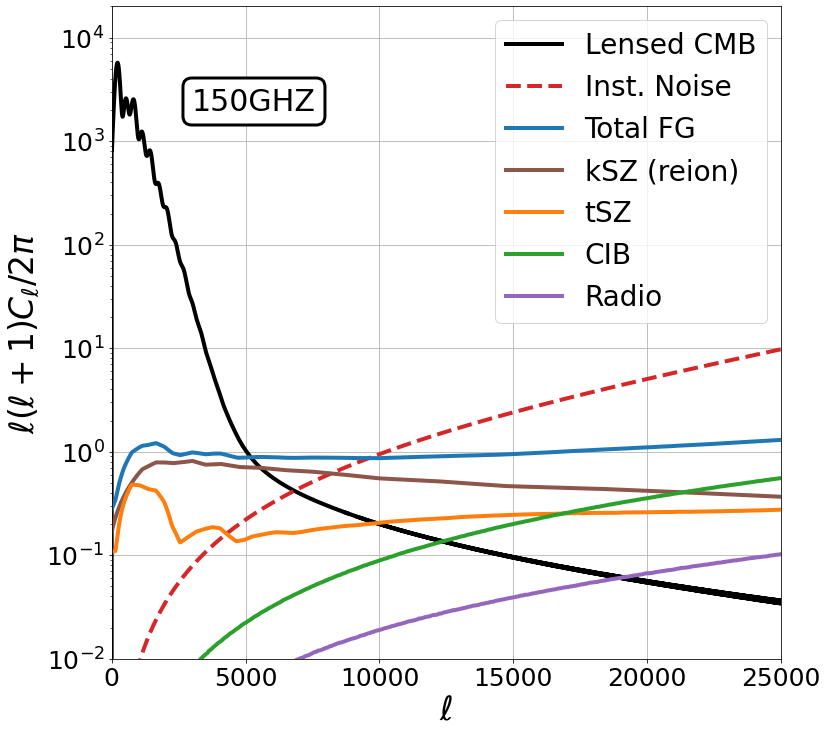

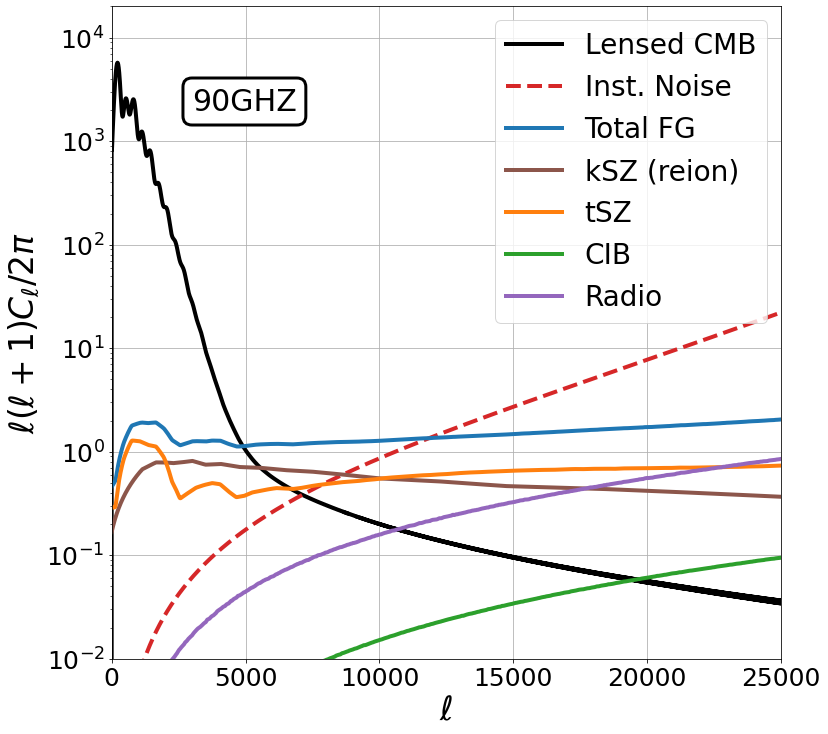

In [9]:
### Figure 1
for freq in [150,90]:
    fig = plt.figure(figsize=(12,12))
    ax = plt.gca()

    colors = []
    for i in range(8):
        colors.append(next(ax._get_lines.prop_cycler)["color"])

    plt.plot(ps_cmb,  ls="-",lw=4, label="Lensed CMB", color="k")
    plt.plot(nls[f"f{freq}"],  ls="--",lw=4, label="Inst. Noise", color=colors[3])
    plt.plot(ps_fgs[f"f{freq}"]["total"],  ls="-",lw=4, label="Total FG", color=colors[0])
    plt.plot(ps_fgs[f"f{freq}"]["ksz"],  ls="-",lw=4, label="kSZ (reion)", color=colors[5])
    plt.plot(ps_fgs[f"f{freq}"]["tsz"],  ls="-",lw=4, label="tSZ", color=colors[1])
    plt.plot(ps_fgs[f"f{freq}"]["cib"],  ls="-",lw=4, label="CIB", color=colors[2])
    plt.plot(ps_fgs[f"f{freq}"]["rad"],  ls="-",lw=4, label="Radio", color=colors[4])

    plt.text(3000,2e3, f"{freq}GHZ", fontsize=30, 
                      bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', alpha=1, linewidth= 3))
    ax.set_ylim((1e-2, 2e4))
    ax.set_xlim((0, 25000))
    ax.set_yscale("log")
    plt.tick_params(axis='both', which='major', labelsize=25)
    ax.set_ylabel(r"$\ell(\ell+1)C_\ell/2\pi$", {"fontsize":33})
    plt.grid(True)

    plt.legend(fontsize=28, loc="upper right")    
    ax.set_xlabel(r"$\ell$", {"fontsize":33})
    plt.show()

In [33]:
## Load Data Files For Figure 3

## helper functions
def chi2(cov, target, ref):
    diff = target-ref
    invcov = np.linalg.inv(cov)
    
    tmp = np.matmul(invcov, diff.T)
    chi2 = np.matmul(diff, tmp)
    return chi2

## Load Lbin
Lbin = np.loadtxt(data_path("cmbhd_delta300_lbin_4800_20100.txt"))

## CDM CLkk (from Nguyen et al 2017; https://arxiv.org/abs/1710.03747)
## column1: Lbin, column2: Clkk_binned
clkk_cdm = np.loadtxt(data_path("nguyen_cdm_clkk_delta300_4800_20100.txt"))[:,1]

## CDM CLkk (generated using WarmAndFuzzy code; https://arxiv.org/abs/1605.05973)
## column1: Lbin, column2: Clkk_binned
clkk_fdm = np.loadtxt(data_path("nguyen_fdm_clkk_delta300_4800_20100.txt"))[:,1]

## Load COVMAT (51x51)
clkk_cov = np.loadtxt(data_path("cmbhd_covmat_fsky05_include_ksz.tsz.cib.rad_delta300_4800_20100.txt"))


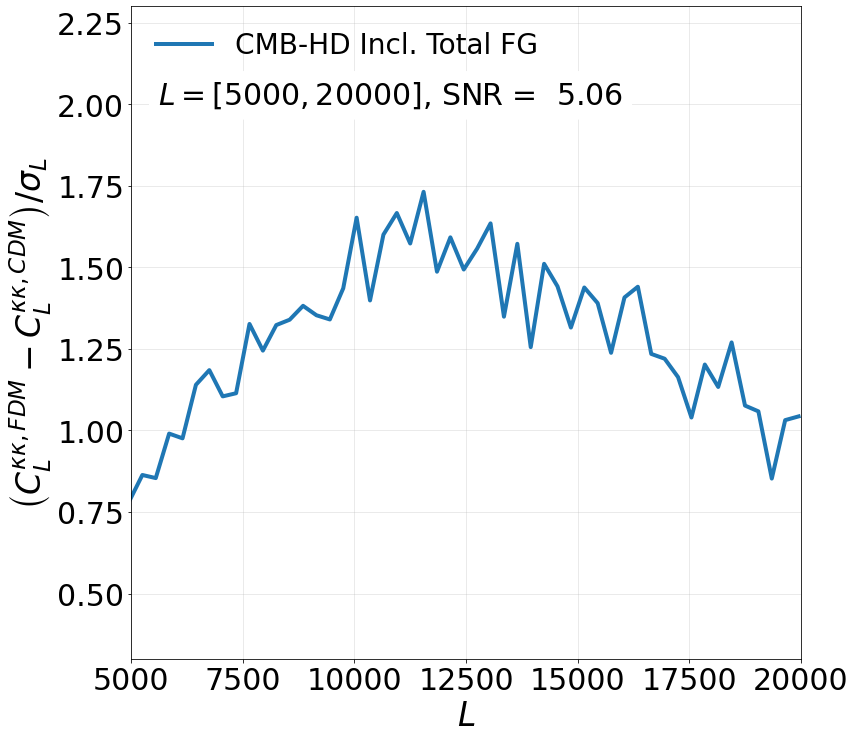

In [34]:
### Figure 3

plt.figure(figsize=(12,12))
ax = plt.gca()

chi2 = chi2(clkk_cov, clkk_fdm, clkk_cdm)
errors = np.sqrt(np.diag(clkk_cov))

plt.plot(Lbin, (clkk_cdm-clkk_fdm)/errors,
        marker='', lw=4, markersize=20, label="CMB-HD Incl. Total FG")
plt.text(5600,2, r"$L = [5000,20000]$, SNR = {:5.2f}".format(np.sqrt(chi2)), fontsize=30, 
  bbox=dict(facecolor='white', edgecolor='none', boxstyle='round', alpha=1, linewidth= 3))

plt.ylim(0.3,2.3)
plt.xlim(5000,20000)
plt.xscale('linear')
plt.xlabel(r"$L$", fontsize=33)
plt.ylabel(r"$\left( C_L^{\kappa\kappa, FDM} - C_L^{\kappa\kappa,CDM} \right) / \sigma_L$", fontsize=33)
ax.tick_params(axis='both', which='major', labelsize=30)
plt.grid(alpha=0.32)
plt.legend(fontsize=28, loc="upper left", frameon=False)
plt.show()